In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-2-bd2f45255cf5>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


#Image Smoothing (Image Blurring)
##Image Filtering
이미지도 음성 신호처럼 주파수로 표현할 수 있음

일반적으로 고주파는 밝기의 변화가 많은 곳, 즉 경계선 영역에서 나타나며, 일반적인 배경은 저주파로 나타냄

이것을 바탕으로 고주파를 제거하면 Blur처리가 되며, 저주파를 제거하면 대상의 영역을 확인 가능
Low-pass filter(LPF)와 High-pass filter(HPF)를 이용하여,
LPF를 적용하면 노이즈제거나 blur처리를 할 수 있으며, HPF를 적용하면 경계선을 찾을 수 있음

cv2.filter2D()

일반적으로 많이 사용되는 필터


In [3]:
files.upload()

Saving bee.jpg to bee.jpg


{'bee.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crT

In [4]:
img = cv2.imread('bee.jpg')
img.shape

(427, 640, 3)

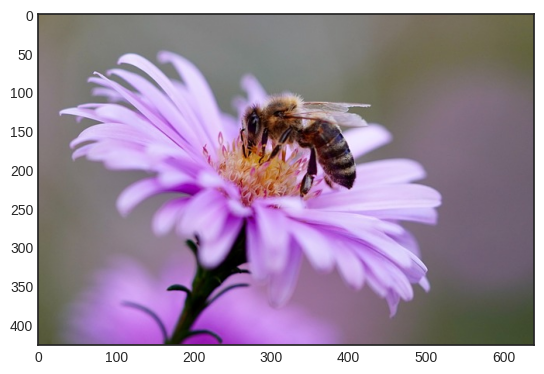

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [7]:
kernel = np.ones((5,5),np.float32)/(25)

print(kernel.shape)

(5, 5)


In [8]:
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


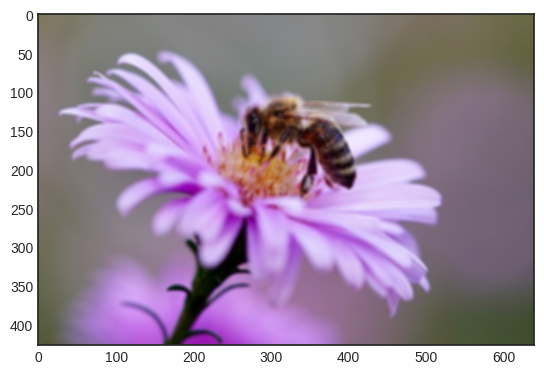

In [9]:
dst = cv2.filter2D(img, -1,kernel)

plt.imshow(dst)
plt.show()

#Image Blurring
low-pass filter를 이미지에 적용하여 얻을 수 있음

고주파영역을 제거함으로써 노이즈를 제거하거나 경계선을 흐리게 할 수 있음

OpenCV에서 제공하는 blurring 방법

Averaging

Gaussian Filtering

Median Filtering

Bilateral Filtering

#Averaging
Box형태의 kernel을 이미지에 적용한 후 평균값을 box의 중심점에 적용하는 형태

cv2.blur() 또는 cv2.boxFilter()

cv2.blur()

Parameters

src : Chennel수는 상관없으나,
depth(Data Type)은 CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.

ksize : kernel 사이즈(ex; (3,3))

이미지의 Data Type

CV_8U : 8-bit unsigned integer: uchar ( 0..255 )

CV_8S : 8-bit signed integer: schar ( -128..127 )

CV_16U : 16-bit unsigned integer: ushort ( 0..65535 )

CV_16S : 16-bit signed integer: short ( -32768..32767 )

CV_32S : 32-bit signed integer: int ( -2147483648..2147483647 )

CV_32F : 32-bit floating-point number: float ( -FLT_MAX..FLT_MAX, INF, NAN )

CV_64F : 64-bit floating-point number: double ( -DBL_MAX..DBL_MAX, INF, NAN )

일반적으로 Data Type과 채널수가 같이 표현이 되어 CV_8UC1 과 같이 표현
(8bit unsiged integer이면서 채널이 1개)

In [10]:
img = cv2.imread('bee.jpg')
print(img.shape)

(427, 640, 3)


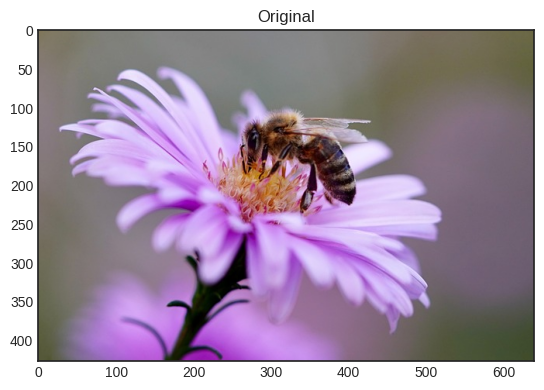

In [11]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.title('Original')
plt.imshow(img)
plt.show()


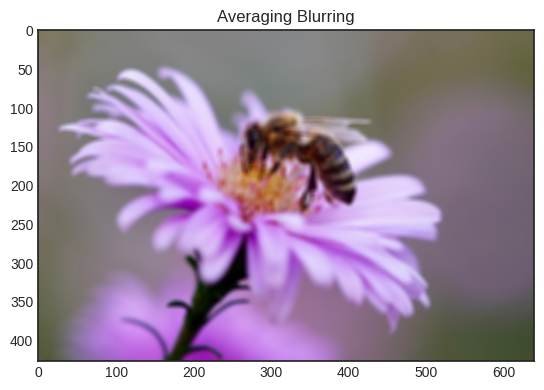

In [12]:
dst1 = cv2.blur(img, (7,7))

plt.title('Averaging Blurring')
plt.imshow(dst1)
plt.show()

#Gaussian Filtering
box filter는 동일한 값으로 구성된 kernel을 사용하지만, Gaussian Filter는 Gaussian함수를 이용한 Kernel을 적용

kernel 행렬의 값을 Gaussian 함수를 통해서 수학적으로 생성하여 적용
kernel의 사이즈는 양수이면서 홀수로 지정을 해야 됨

이미지의 Gaussian Noise (전체적으로 밀도가 동일한 노이즈, 백색노이즈)를 제거하는 데 가장 효과적

cv2.GaussianBlur()

Parameters

img : Chennel수는 상관없으나, depth(Data Type)은 CV_8U, CV_16U, CV_16S, CV_32F or CV_64F

ksize : (width, height) 형태의 kernel size.
width와 height는 서로 다를 수 있지만, 양수의 홀수로 지정해야 함

sigmaX : Gaussian kernel standard deviation in X direction.

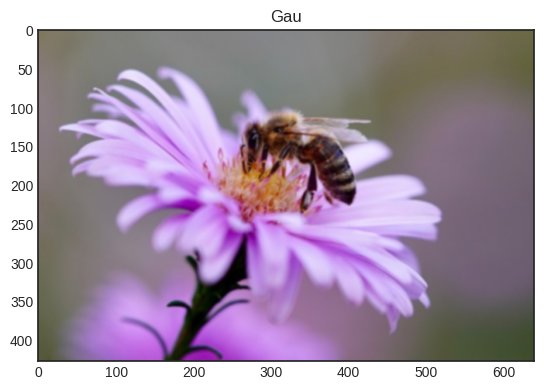

In [13]:
dst2 = cv2.GaussianBlur(img,(5,5),0)

plt.title("Gau")
plt.imshow(dst2)
plt.show()


#Median Filtering
kernel window와 pixel의 값들을 정렬한 후에 중간값을 선택하여 적용

salt-and-pepper noise 제거에 가장 효과적

cv2.medianBlur()

Parameters

src : 1, 3, 4 channel image
depth가 CV_8U, CV_16U, or CV_32F 이면 ksize는 3또는5, CV_8U이면 더 큰 ksize가능

ksize : 1보다 큰 홀수

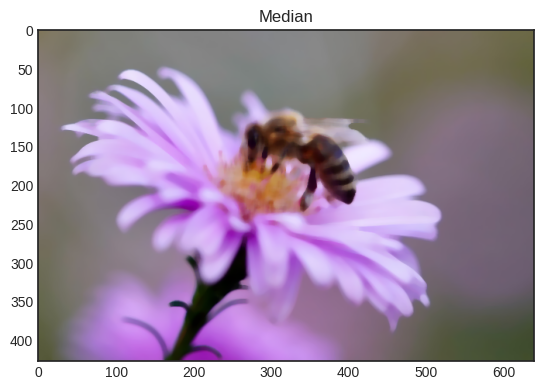

In [16]:
dst3 = cv2.medianBlur(img,9)

plt.title("Median")
plt.imshow(dst3)
plt.show()

#Bilateral Filtering
위 3가지 Blur 방식은 경계선까지 Blur 처리가 되어, 경계선이 흐려지게 됨

Bilateral Filtering(양방향 필터)은 경계선을 유지하면서 Gaussian Blur처리를 해주는 방법

cv2.bilateralFilter()

Parameters

src : 8-bit, 1 or 3 Channel image

d : filtering시 고려할 주변 pixel 지름

sigmaColor : Color를 고려할 공간. 숫자가 크면 멀리 있는 색도 고려

sigmaSpace : 숫자가 크면 멀리 있는 pixel도 고려

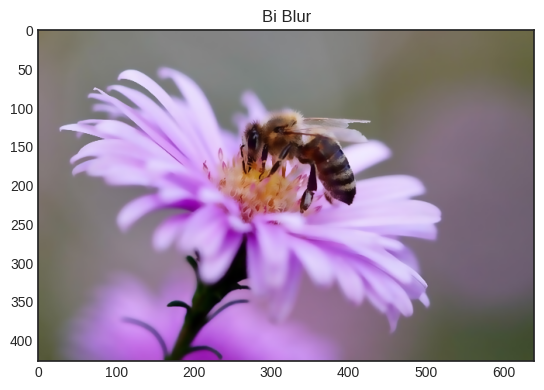

In [18]:
dst4 = cv2.bilateralFilter(img,9,75,75)

plt.title('Bi Blur')
plt.imshow(dst4)
plt.show()

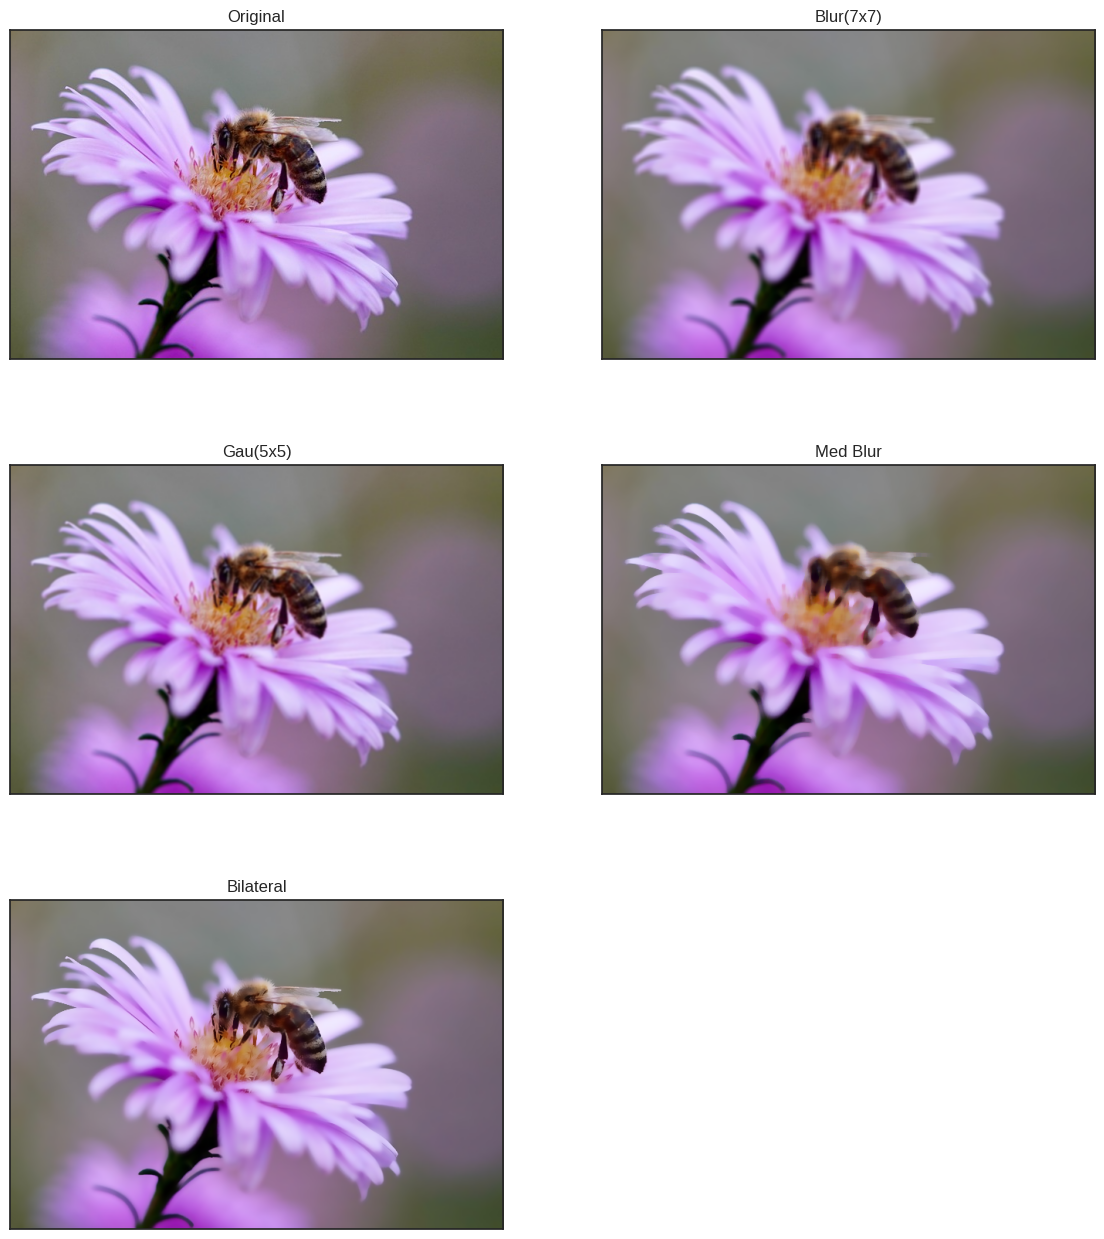

In [19]:
plt.figure(figsize=(14,16))
images = [img,dst1,dst2,dst3,dst4]
titles = ['Original','Blur(7x7)','Gau(5x5)','Med Blur','Bilateral']

for i in range(5):
  plt.subplot(3,2,i+1)
  plt.imshow(images[i])
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])

plt.show()
